In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
!pip install WordCloud

In [4]:
import wordcloud

In [ ]:
!pip install openpyxl

In [5]:
import openpyxl

In [ ]:
!pip install nltk

In [ ]:
!pip install spacy

In [ ]:
import spacy


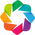

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -2]
[nltk_data]     Name or service not known>


In [35]:
import os
import datetime
import codecs
import re
import warnings
warnings.filterwarnings('ignore')
import pkg_resources, imp
imp.reload(pkg_resources)
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from matplotlib import pyplot as plt
# import neologdn
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from spacy.lang.ja import Japanese
import regex
from wordcloud import WordCloud
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# import shap
# shap.initjs()
# import oseti

In [6]:
import os
os.getcwd()
print(os.getcwd())

/kaggle/working


In [7]:
import re
import itertools
import unicodedata
from janome.tokenizer import Tokenizer
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Droid Sans Japanese'

In [8]:
import pandas as pd

# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
# col_list=[10,11,15,16]
# df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence1','sentence2','sentence3','sentence4'])
col_list=[15]
df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence'])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(5)

Number of training sentences: 132



,sentence
54,多くの泌尿器科専門医が特に夜間頻尿を訴えるケースにはβ3を使うといった流れが出来つつあります
95,非薬物療法の知識の強化することで薬物導入について的確なDTLが可能になると思う。
101,Drインサイトを捉えたdtl
30,β作動薬とのすみわけどうつけていくか、TOVはこう言った症例、β作動薬はこう言った症例と明確...
28,βとの差別化


In [9]:
# tweets

In [10]:
# df.iloc[:,0].as_matrix()

In [15]:
tweets = df['sentence'].as_matrix()
# tweets=df['sentence1'].as_matrix()+df['sentence2'].as_matrix()+df['sentence3'].as_matrix()+df['sentence4'].as_matrix()
# tweets = df['sentence1'].as_matrix()
regex = u'[^\u3041-\u3093\u30A1-\u30F4\u4E00-\u9FCB]'
t = Tokenizer()

tweet_words = []
for tweet in tweets:
    tweet = re.sub(regex, ' ', tweet)
    words = []
    for token in t.tokenize(tweet):
        speechs = token.part_of_speech.split(',')
        if ('名詞' in speechs) or ('形容詞' in speechs) or ('動詞' in speechs):
            if len(token.surface) > 1:
                words.append(token.surface)
    tweet_words.append(words)

len(tweet_words)

132

In [16]:
# tweet_words

In [17]:
word_cnt = {}
for words in tweet_words:
    for word in words:
        if word not in word_cnt:
            word_cnt[word] = 1
        else:
            word_cnt[word] += 1
    
word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
len(word_cnt_df)

350

In [18]:
# word_cnt_df

In [19]:
word_cnt_df[['cnt']].describe()

,cnt
count,350.000000
mean,2.008571
std,2.346108
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


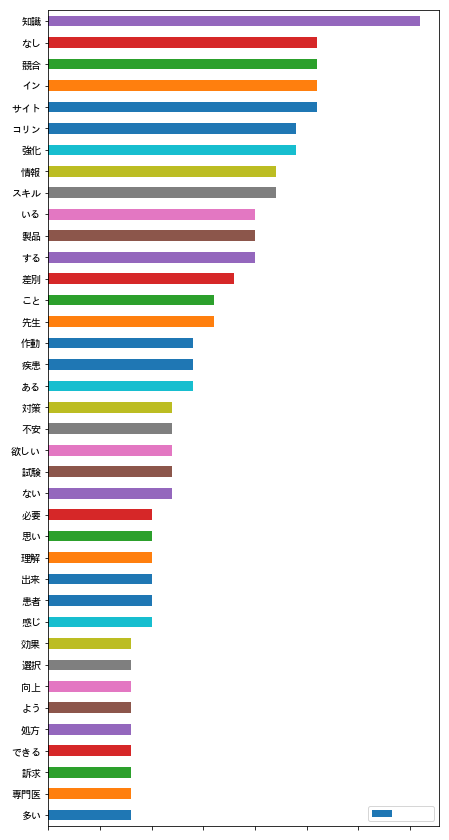

In [20]:
tmp = word_cnt_df[word_cnt_df['cnt'] > 3]
# tmp.sort_values(by='cnt', ascending=False).plot(kind='bar', x='word', y='cnt', figsize=(15,7), legend=False)
tmp.sort_values(by='cnt', ascending=True).plot.barh( x='word', y='cnt',figsize=(7,15))
plt.show()

### 两个词的

In [21]:
# tweet_words
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

one_word_list=flatten_list(tweet_words)
# print(one_word_list)

In [22]:
from itertools import permutations
# list_test=keysList
word_2=permutations(one_word_list,2)
two_unit_list = [''.join(i) for i in word_2]
# print(two_unit_list)

In [23]:
sentences = df.sentence.values
print(sentences[5])
col15_sentence=[]
for sen in sentences:
    col15_sentence.append(sen)
col15_sentence_text='.'.join(col15_sentence)

def unit2_dictionary(str,word_list):
    counts = dict()
    for word in word_list:
        dic=str.count(word)
        # counts[word] =dic
        if dic!=0:
            counts[word] =dic
    return counts
unit2_dic=unit2_dictionary(col15_sentence_text,two_unit_list)
# print(unit2_dic)

しっかり話し込みが出来た先生には、TOVの効果面や安全性(FORTA等)はお伝えできた。課題は、面会が困難で短時間面会Drや不面Drへの対策が不十分なこと。


In [24]:
dict1 = unit2_dic
sorted_dict = {}
sorted_keys = sorted(dict1, key=dict1.get,reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = dict1[w]

# print(sorted_dict) 

In [25]:
two_word_cnt_df = pd.DataFrame({'two_word': [k for k in sorted_dict.keys()], 'two_word_freq': [v for v in sorted_dict.values()]})
len(two_word_cnt_df)
two_word_cnt_df.head(8)

,two_word,two_word_freq
0,インサイト,13
1,製品知識,5
2,患者さん,3
3,いる先生,2
4,すること,2
5,臨床試験,2
6,活動膀胱,2
7,出来るよう,2


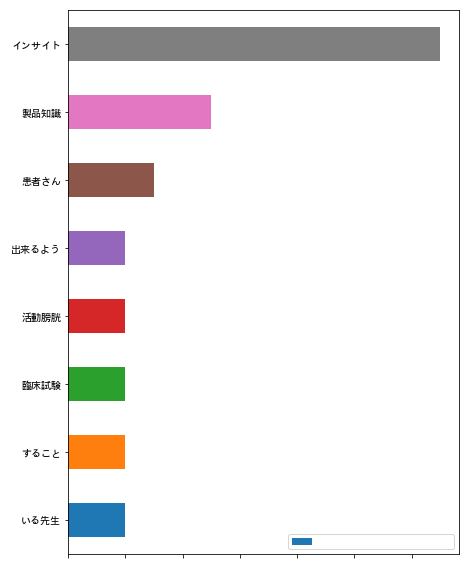

In [26]:
tmp2 = two_word_cnt_df[two_word_cnt_df['two_word_freq'] > 1]
# tmp2.sort_values(by='two_word_freq', ascending=False).plot(kind='bar', x='two_word', y='two_word_freq', figsize=(15,7), legend=False)
tmp2.sort_values(by='two_word_freq', ascending=True).plot.barh( x='two_word', y='two_word_freq',figsize=(7,10),legend=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f636fdec048>,
      dtype=object)

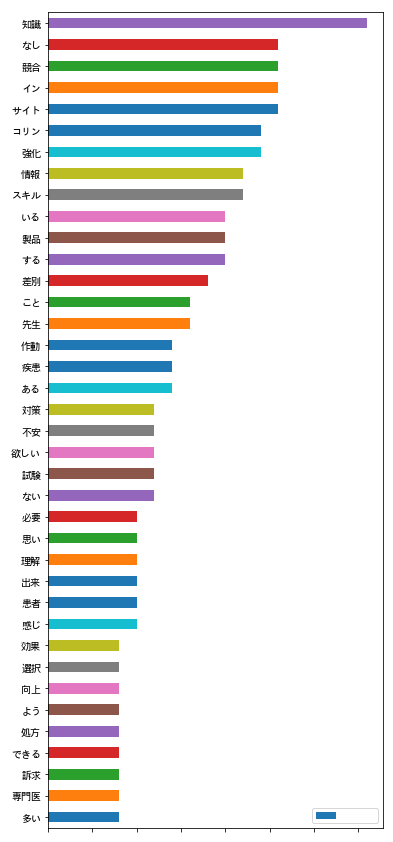

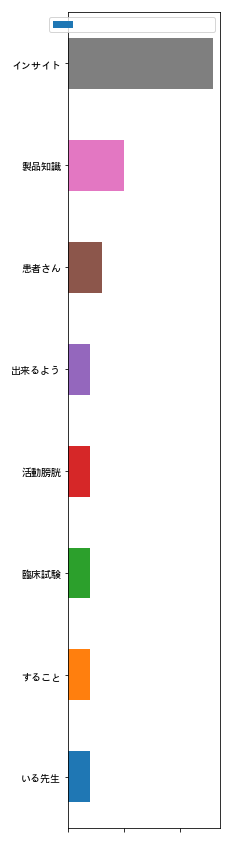

In [27]:
fig=plt.figure()
# ax1=fig.add_subplot(121)
tmp.sort_values(by='cnt', ascending=True).plot.barh( x='word', y='cnt',figsize=(6,15),subplots=True, layout=(1, 1), sharex=False)
# ax2=fig.add_subplot(122)
tmp2.sort_values(by='two_word_freq', ascending=True).plot.barh( x='two_word', y='two_word_freq',figsize=(6,15),subplots=True, layout=(1, 2), sharex=False)



In [28]:
# tweet_combinations

In [29]:
vocab = {}
target_words = word_cnt_df[word_cnt_df['cnt'] > 3]['word'].as_matrix()
for word in target_words:
    if word not in vocab:
        vocab[word] = len(vocab)

re_vocab = {}
for word, i in vocab.items():
    re_vocab[i] = word
    
len(vocab)

38

In [30]:
# vocab
# re_vocab

In [31]:
# tweet_combinations

In [36]:
tweet_combinations = [list(itertools.combinations(words, 2)) for words in tweet_words]
combination_matrix = np.zeros((len(vocab), len(vocab)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in target_words and comb[1] in target_words:
            combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
            combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
        
for i in range(len(vocab)):
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [37]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.125     ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 1.        , ..., 0.        , 0.11111111,
        0.09090909],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.2       ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.2       , 1.        ,
        0.        ],
       [0.125     , 0.16666667, 0.09090909, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
nodes = []

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocab[i], re_vocab[j], word_cnt[re_vocab[i]], word_cnt[re_vocab[j]], jaccard])
            
len(nodes)

545

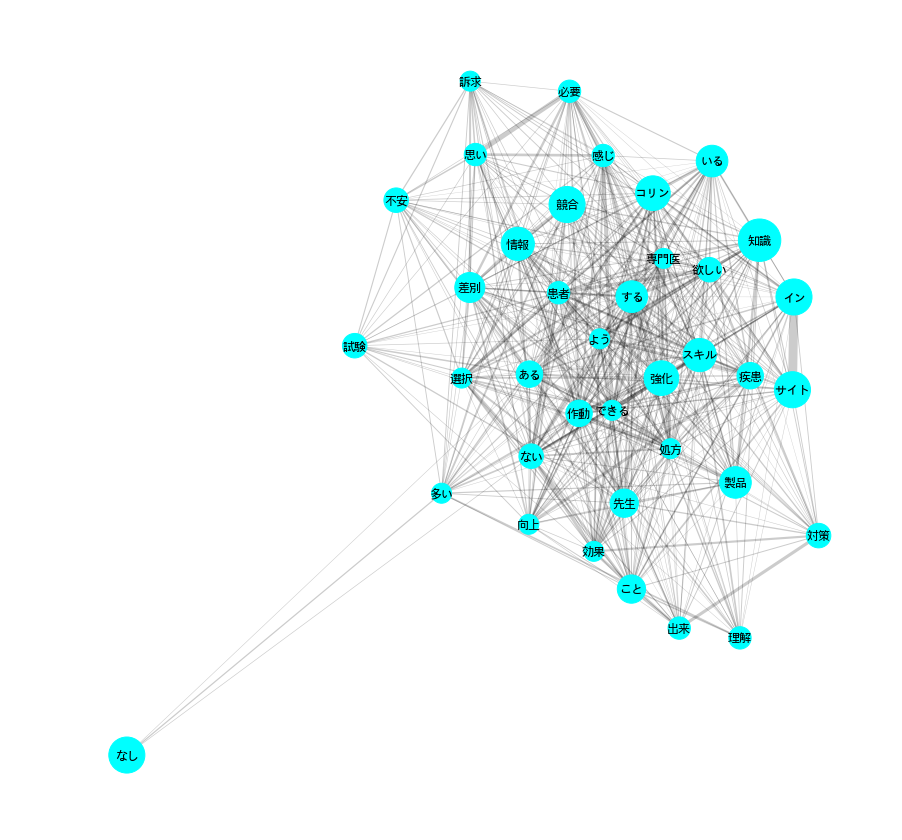

In [39]:
G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.1)

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='cyan', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Droid Sans Japanese')

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

In [46]:
wordcloud_text=' '.join(one_word_list)

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud(text_list):
#     d = path.dirname(__file__)
    wc = WordCloud(max_words=2000,
                max_font_size=40,
                font_path='./fonts/SourceHanSerifK-Light.otf',
#                 font_path='Droid Sans Japanese',
#                 font_path='./fonts/mdjhbd.ttf',
#                 font_path='./fonts/simhei.ttf',
#                 font_path='~/Library/Fonts/NotoSansCJKjp-Light.otf',
#                 font_path="~/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc",
#                 fontpath="MS Gothic",
#                 font_path="/system/Library/Fonts/ヒラギノ角ゴシック W4.ttc",
                background_color='white',
                random_state=42,
                relative_scaling=0)
    wc.generate(text_list)
    # Plot
    plt.figure()
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
word_cloud(wordcloud_text)

OSError: cannot open resource